# SpectralFPM Simulation

Neerja Aggarwal

Oct 23rd, 2024

Simulate the measurement & attempt reconstruction for a spectral object. 


In [17]:
import fpm_helper as fpm
import matplotlib.pyplot as plt
import numpy as np
import torch
# plt.style.use('dark_background')

In [18]:
device = fpm.use_gpu(0)

# setup the fpm system

In [19]:
mag = 4 # 4x 
pix_size_camera = 4 #  micron"

wv_start = 400e-3 # micron
wv_end = 800e-3 # micron
wv_step = 50e-3 # micron
wv_range = np.arange(wv_start,wv_end, wv_step)
print(wv_range)

# wv = 500e-3 # micron
na_obj = 0.05 # low na objective 

fpm_setup = fpm.FPM_setup(mag = mag, pix_size_camera = pix_size_camera, wv = wv_range, na_obj = na_obj)
print(fpm_setup)

[0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75]
Using stock object data
FPM Setup Parameters:
--------------------
Camera pixel size: 4 microns
Magnification: 4x
Object pixel size: 1.000 microns
Numerical aperture: 0.05
Wavelength(s): [0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75] microns
Number of wavelengths: 8
Image dimensions: 1178 x 1178 pixels
LED Spacing: 5 mm
Distance: 75 mm
Total number of angles: 0
Spectral Object: uniform
--------------------


# view the obj

In [20]:
plt.imshow(torch.sum(fpm_setup.objstack, dim =0), cmap = 'gray')

In [21]:
fpm_setup.wv

tensor([0.4000, 0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500])

/home/neerja/CODE/SpectralPtychographyProjectGitRepo/fpm_helper.py:344: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  wavelengths = torch.tensor(wavelengths, dtype=torch.float32)


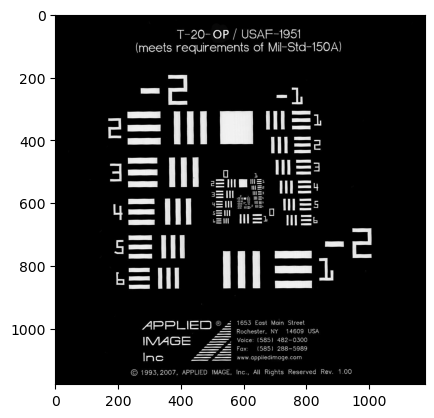

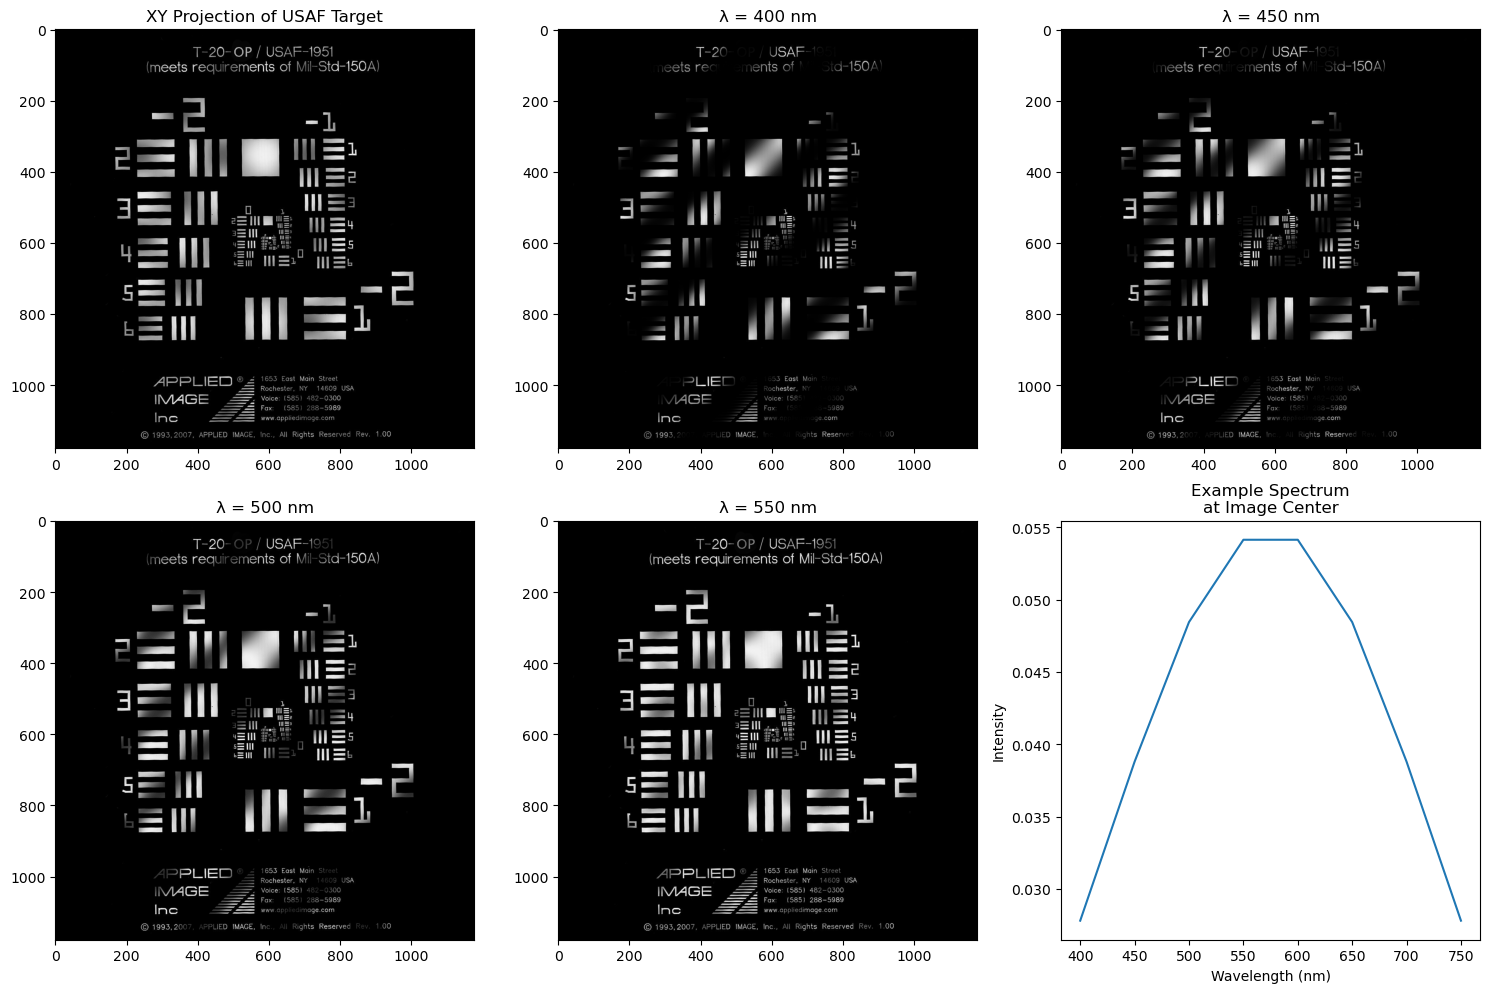

In [22]:
# make a spectrally varying object
spectral_obj = fpm_setup.create_spectral_usaf_object(sinrate = 5, cosrate = 5)
wavelengths = fpm_setup.wv * 1e3 # convert to nm
usaf_image = fpm_setup.obj.detach().cpu().numpy()

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Show XY PROJECTION OF USAF target
axes[0].imshow(torch.sum(spectral_obj, axis = 0).detach().cpu().numpy(), cmap = 'gray')
axes[0].set_title('XY Projection of USAF Target')

# Show spectral slices
for i, wl in enumerate(wavelengths[:4]):
    axes[i+1].imshow(spectral_obj[i].detach().cpu().numpy(), cmap='gray')
    axes[i+1].set_title(f'λ = {wl:.0f} nm')

# Show example spectrum from center
center_y, center_x = usaf_image.shape[0]//2, usaf_image.shape[1]//2
axes[5].plot(wavelengths, spectral_obj[:, center_y, center_x].detach().cpu().numpy())
axes[5].set_xlabel('Wavelength (nm)')
axes[5].set_ylabel('Intensity')
axes[5].set_title('Example Spectrum\nat Image Center')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.360706].


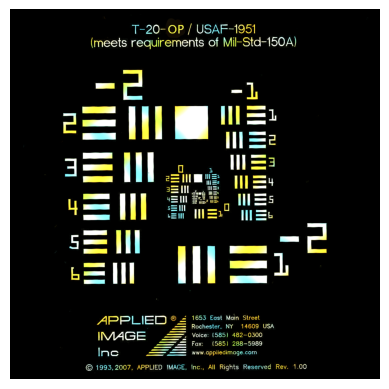

In [23]:
# plot color version of the spectral object
obj_RGB = fpm.spectral_obj_to_color(spectral_obj, wavelengths)
plt.imshow(obj_RGB)
# turn off axes
plt.axis('off')
plt.show()


/home/neerja/CODE/SpectralPtychographyProjectGitRepo/fpm_helper.py:765: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f_width_ind = int(torch.floor(torch.tensor(f_width/df)))  # Convert to PyTorch operation


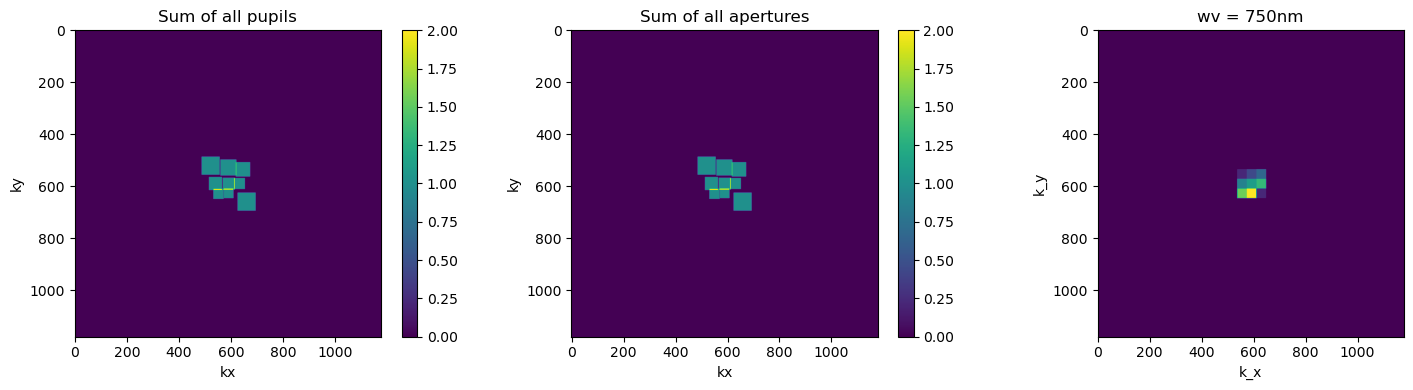

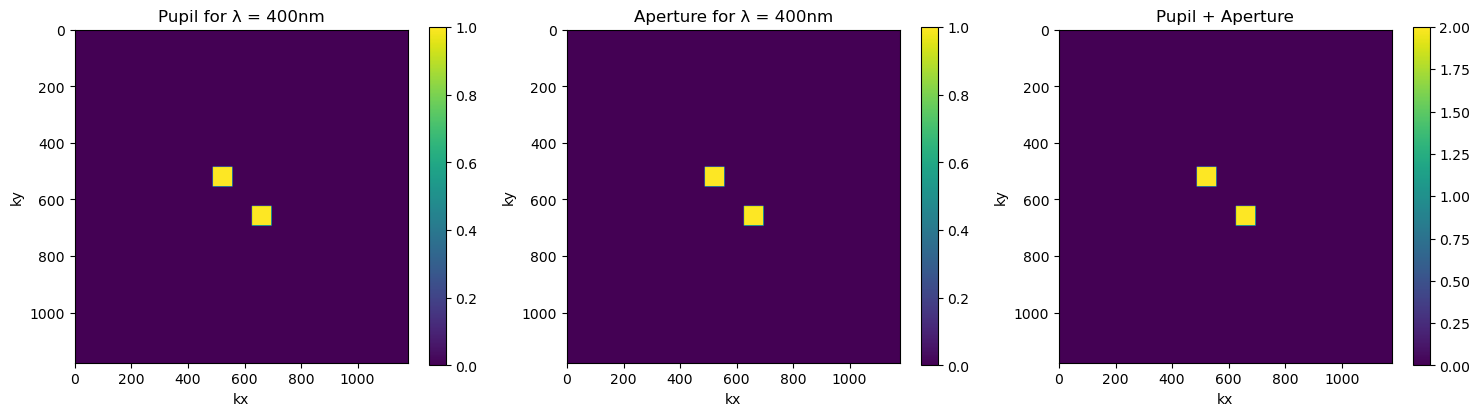

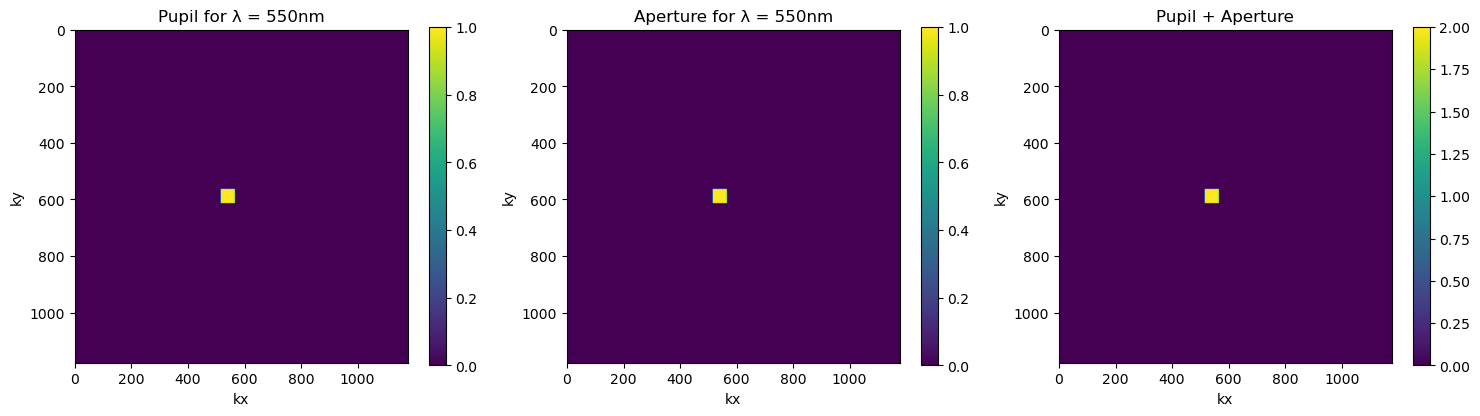

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [24]:
# Create default tiled aperture

# Or create custom tile pattern first
tile = fpm_setup.createTile()
# Modify tile pattern if desired...
aperture_stack = fpm_setup.createAperture(tile)
# update the pupil stack with the aperture
fpm_setup.updatePupilWithAperture()

# View all wavelengths combined
fpm_setup.visualize_pupil_aperture()

# View specific wavelength
fpm_setup.visualize_pupil_aperture(wavelength_index=0)
fpm_setup.visualize_pupil_aperture(wavelength_index=3)

# update the pupil stack with the aperture
fpm_setup.updatePupilWithAperture()


# simulate some measurements

In [25]:
d = 75
led_spacing = 5
num_leds = 5
list_leds = fpm.create_spiral_leds_CLV(num_leds, -4, 4, alpha = 10)
plt.scatter(list_leds[:,1],list_leds[:,0])
plt.axis('square')

(-2.98083403596647, 3.167298669340362, -2.1029380904776254, 4.045194614829207)

In [26]:
list_illums = fpm_setup.createUniformWavelengthPerAngleIllumList(list_leds)
print(list_illums)


[((0.0, 0.0), (0, 1, 2, 3, 4, 5, 6, 7)), ((-0.12202603307847744, -0.0522815874595389), (0, 1, 2, 3, 4, 5, 6, 7)), ((0.055822032712418264, -0.17818162714525057), (0, 1, 2, 3, 4, 5, 6, 7)), ((0.2247150078662268, -0.032951510102377034), (0, 1, 2, 3, 4, 5, 6, 7)), ((0.1824638175738501, 0.1901954646421011), (0, 1, 2, 3, 4, 5, 6, 7))]


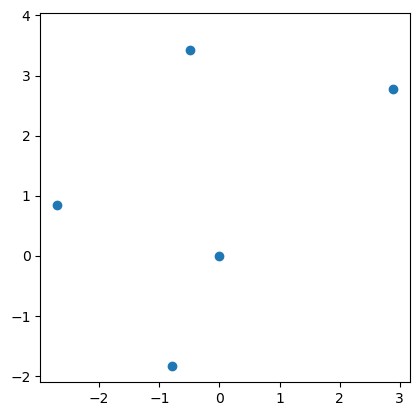

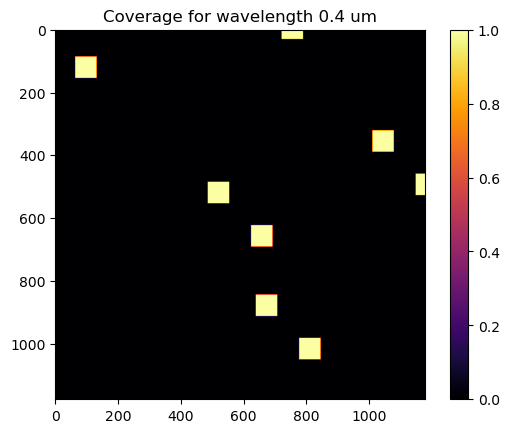

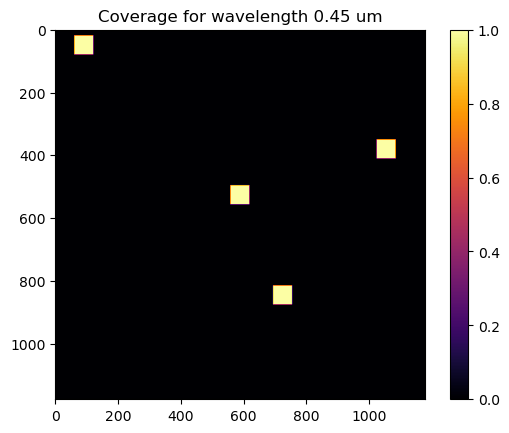

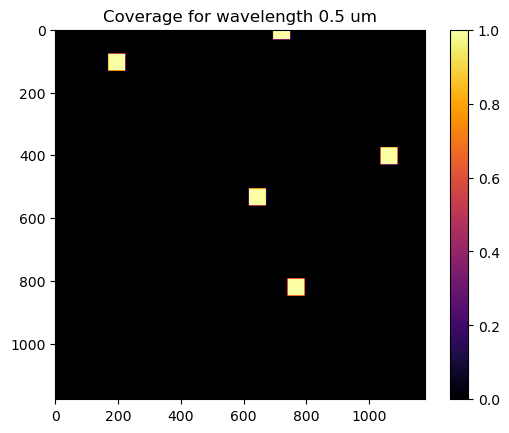

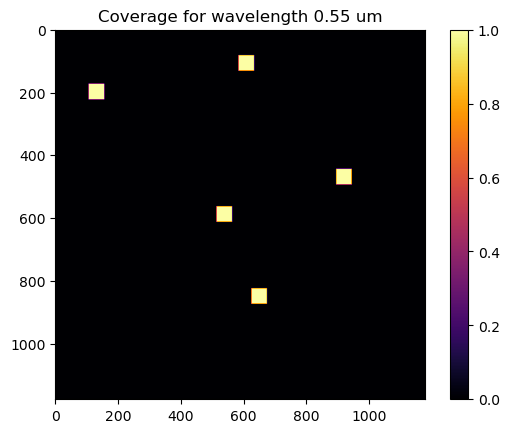

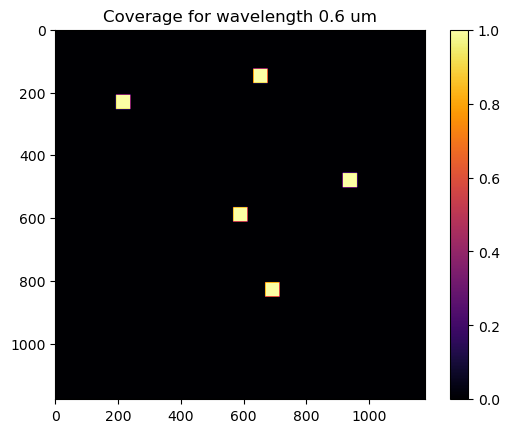

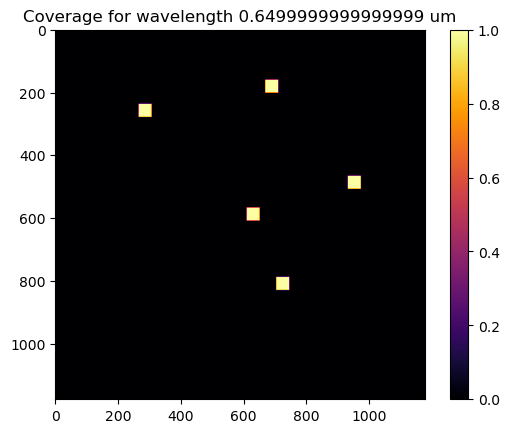

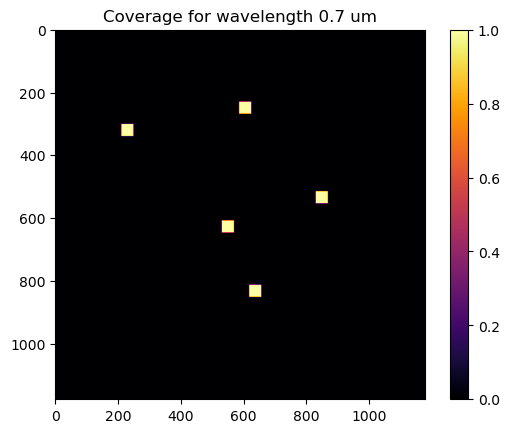

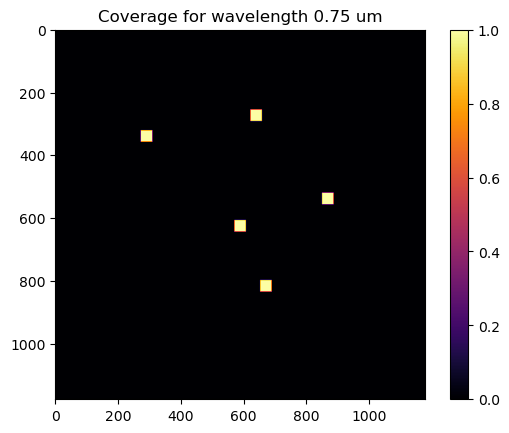

In [27]:
# look at the coverage
coverage = fpm_setup.visualize_objectfft_coverage(list_illums)
for wvind in range(fpm_setup.Nw):
    plt.figure()
    plt.imshow(coverage[wvind].cpu(), cmap = 'inferno')
    plt.colorbar()
    plt.title('Coverage for wavelength {} um'.format(wv_range[wvind]))
    plt.show()


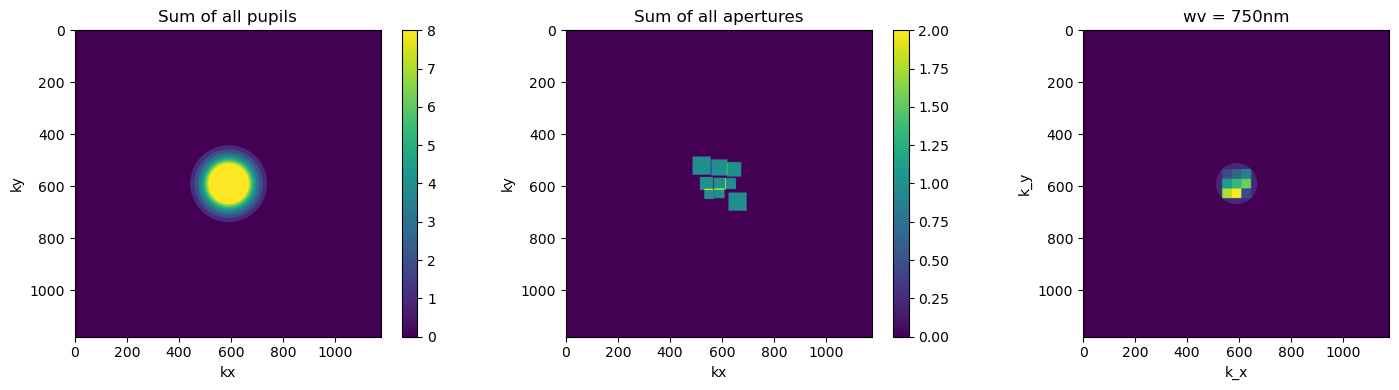

In [28]:
fpm_setup.resetPupil()
fpm_setup.visualize_pupil_aperture() 

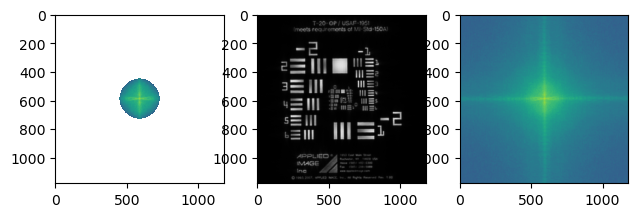

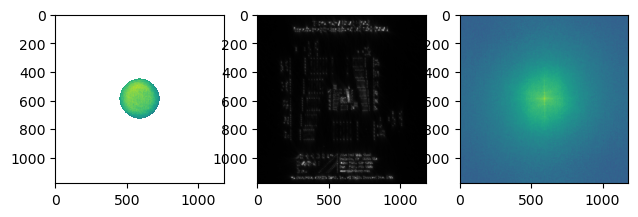

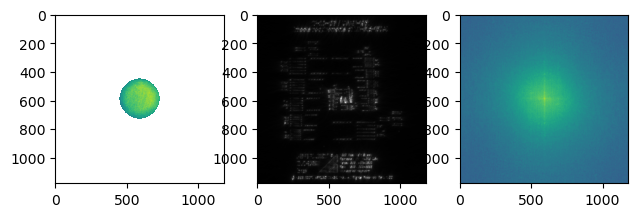

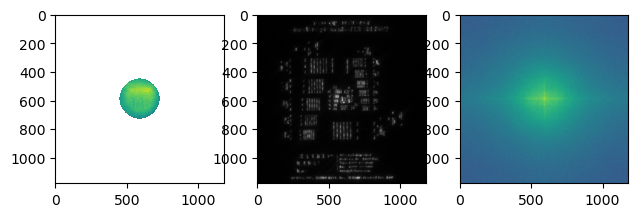

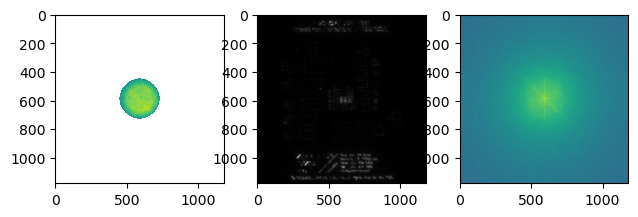

In [29]:
fpm_setup.to(device)
measstack = fpm_setup.createMeasStackFromListIllums()

# Recon

In [30]:
recon = fpm.SparseReconstruction(fpm_setup, measstack, device = device)
recon.initRecon()
recon.parameters(step_size=1e-3, num_iters=100, reg_type='L1', tau_reg = 1e-4)
# recon.wandb_init()
print(recon)

Reconstruction Parameters:
--------------------
Number of measurements: 5
Device: cuda:0
Step size: 0.001
Iterations per measurement: 100
Number of epochs: 1
Optimizer type: Adam
Loss function: 2-norm
--------------------
FPM Setup Parameters:
--------------------
Camera pixel size: 4 microns
Magnification: 4x
Object pixel size: 1.000 microns
Numerical aperture: 0.05
Wavelength(s): [0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75] microns
Number of wavelengths: 8
Image dimensions: 1178 x 1178 pixels
LED Spacing: 5 mm
Distance: 75 mm
Total number of angles: 5
Spectral Object: uniform
Number of illumination configurations: 5
Illumination strategy: Uniform (all wavelengths per angle)
--------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.360706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.360706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.3510492].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.3510492].


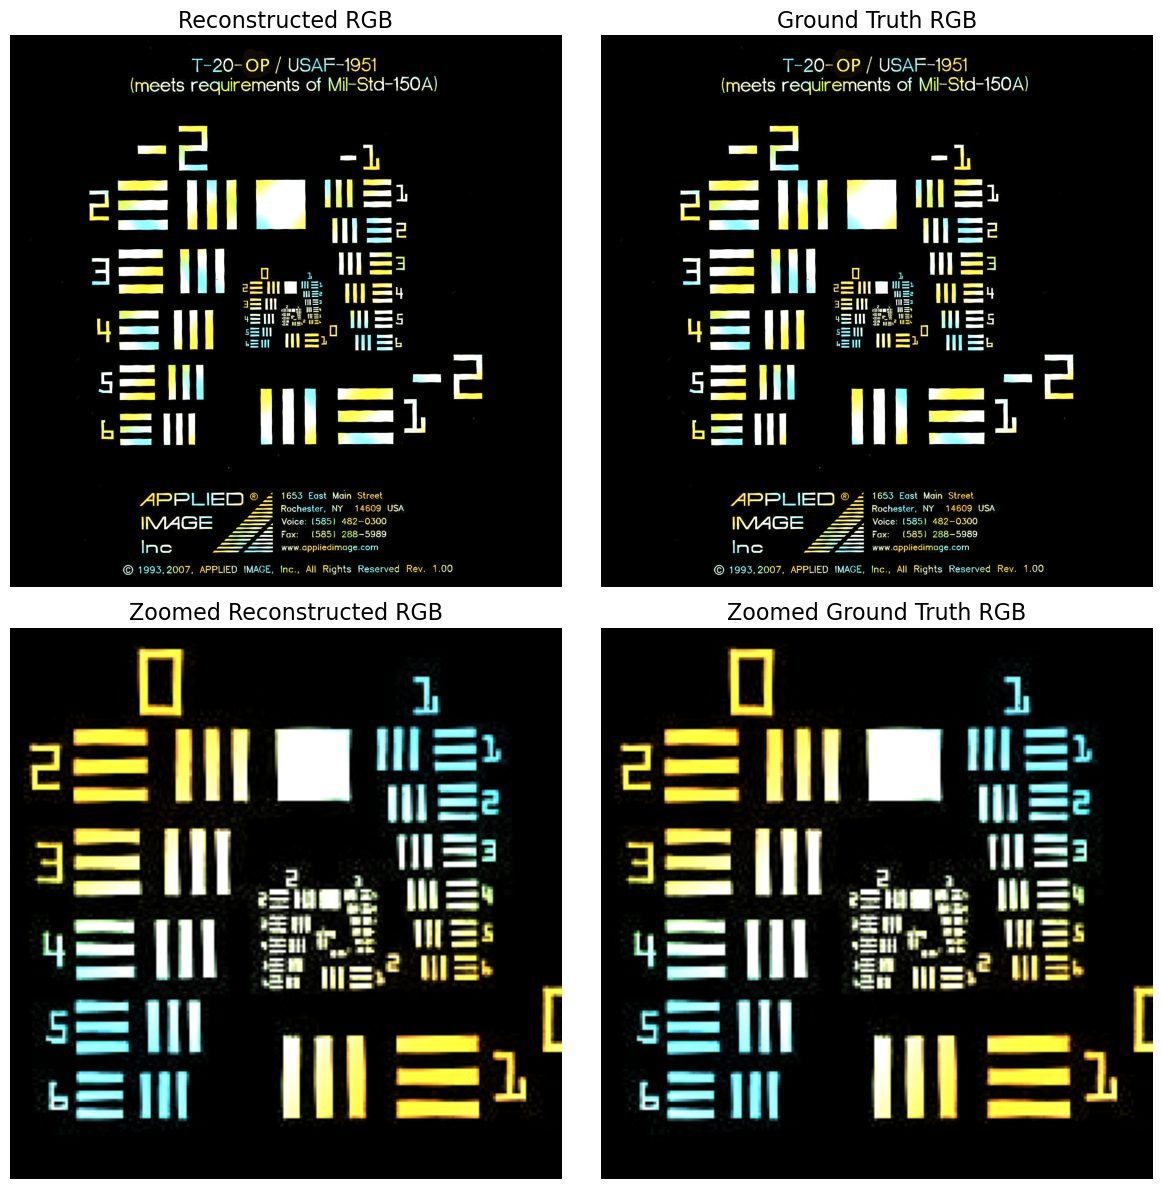

In [16]:
fig = recon.plot_rgb_comparison( recon.fpm_setup.objstack.detach().cpu(), recon.fpm_setup.objstack.detach().cpu(), recon.fpm_setup.wv)
plt.show()

KeyboardInterrupt: 

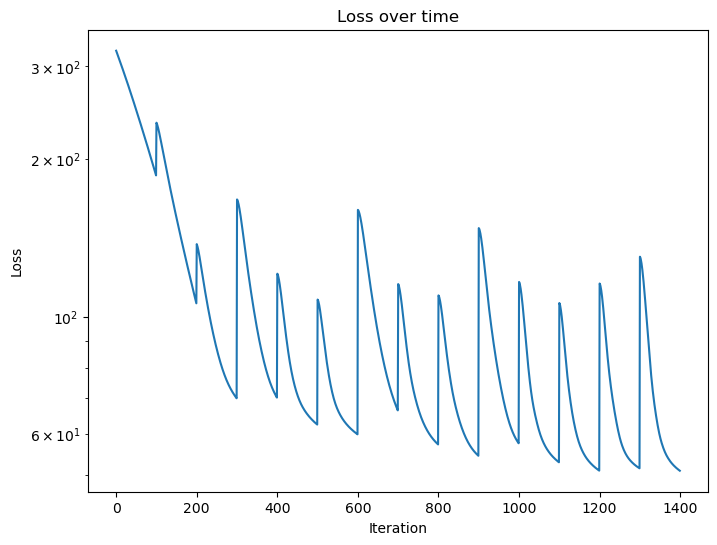

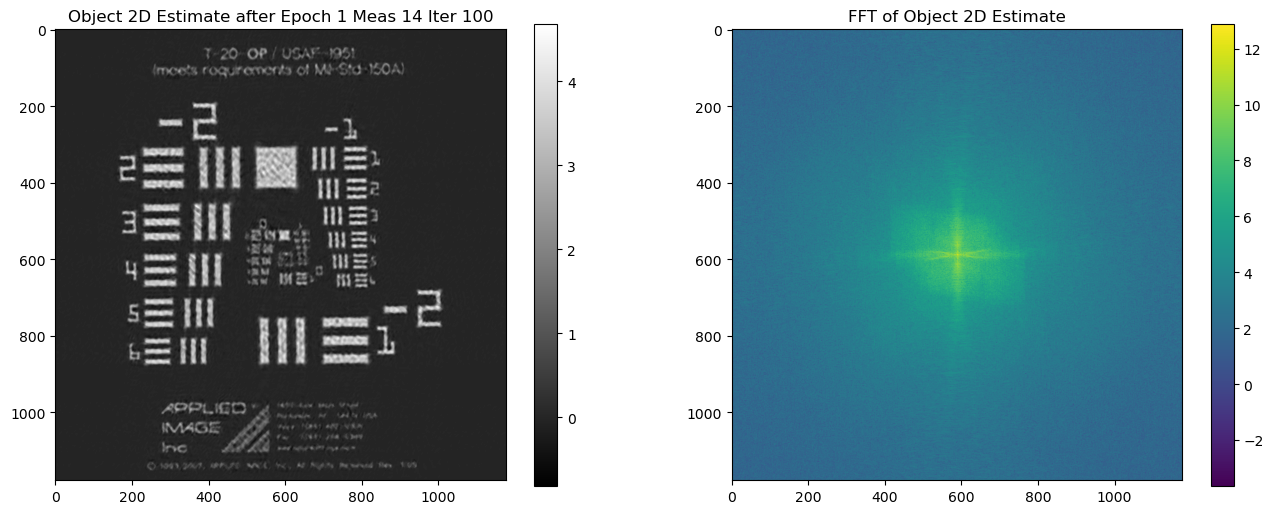

In [10]:
recon.train()

In [11]:
objest = recon.objest.detach().cpu().numpy()

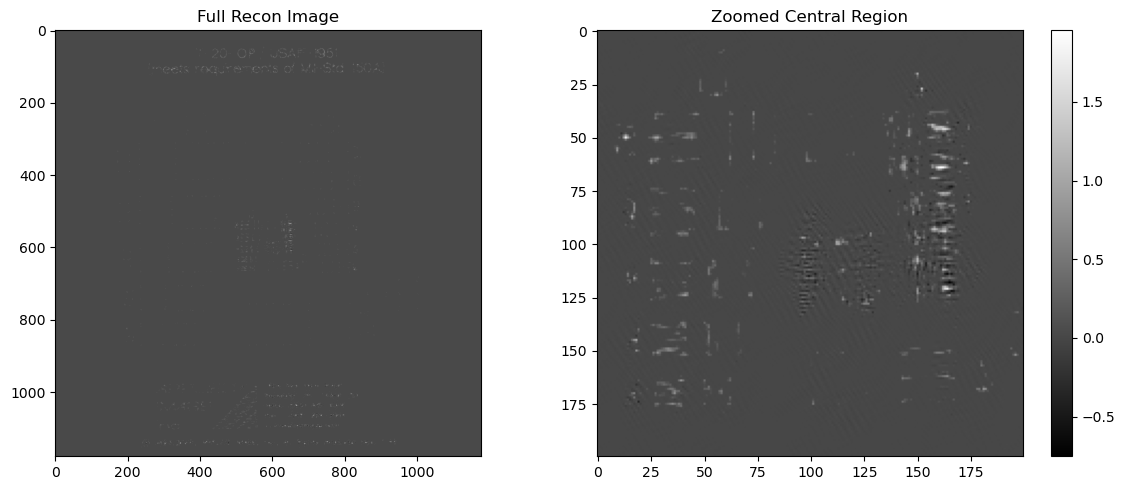

In [12]:
# zooom into the center smaller region
# Get the object estimate
obj2d = np.sum(objest, axis=0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Full image
ax1.imshow(obj2d, cmap='gray')
ax1.set_title('Full Recon Image')

# Zoomed central region
center_y, center_x = obj2d.shape[0]//2, obj2d.shape[1]//2
zoom_size = 200  # Adjust this value to change zoom level
zoom_region = obj2d[center_y-zoom_size//2:center_y+zoom_size//2, 
                   center_x-zoom_size//2:center_x+zoom_size//2]
im2 = ax2.imshow(zoom_region, cmap='gray')
ax2.set_title('Zoomed Central Region')
fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

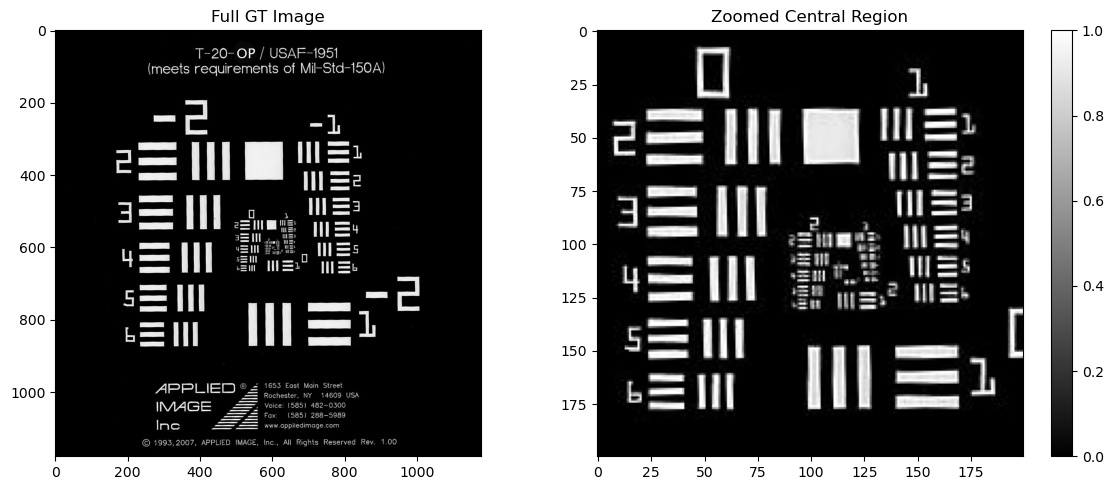

In [13]:
# look a the ground truth
plt.figure()
obj2d = np.squeeze(fpm_setup.obj.detach().cpu().numpy())

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Full image
ax1.imshow(obj2d, cmap='gray')
ax1.set_title('Full GT Image')

# Zoomed central region
center_y, center_x = obj2d.shape[0]//2, obj2d.shape[1]//2
zoom_size = 200  # Adjust this value to change zoom level
zoom_region = obj2d[center_y-zoom_size//2:center_y+zoom_size//2, 
                   center_x-zoom_size//2:center_x+zoom_size//2]
im2 = ax2.imshow(zoom_region, cmap='gray')
ax2.set_title('Zoomed Central Region')
fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Recon FFT')

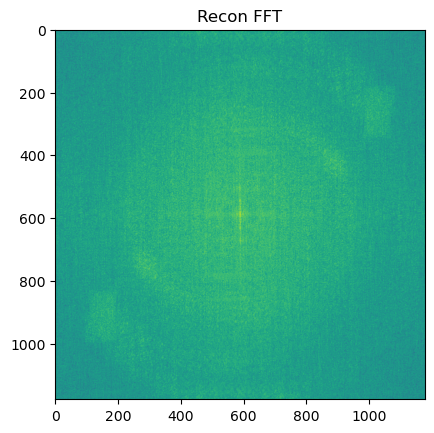

In [14]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.squeeze(np.sum(objest, axis = 0)))))))
plt.title('Recon FFT')

Text(0.5, 1.0, 'GT FFT')

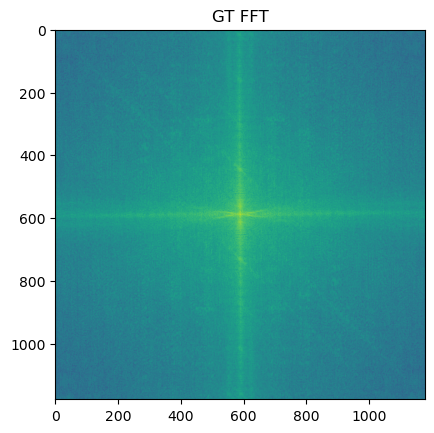

In [15]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.squeeze(recon.fpm_setup.obj.cpu().numpy()))))))
plt.title('GT FFT')

## compare wavelength channels

Text(0.5, 1.0, '800 nm')

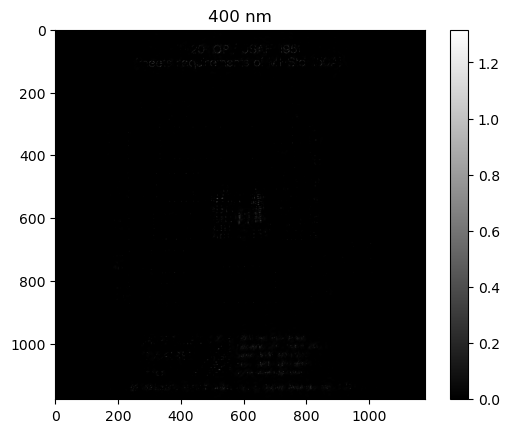

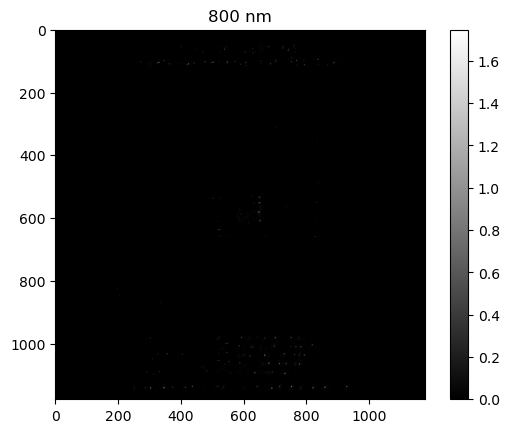

In [16]:
plt.imshow(np.abs(objest[0,:,:]), cmap = 'gray')
plt.colorbar()
plt.title('400 nm')
plt.figure()
plt.imshow(np.abs(objest[-1,:,:]), cmap = 'gray')
plt.colorbar()
plt.title('800 nm')
